<a href="https://colab.research.google.com/github/muralikrishnat29/object-detection-keras-retinanet/blob/master/tensorRT_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
DRIVE_PATH = '/content/drive/My Drive/'
MODELS_PATH = '/content/drive/My\ Drive/detection_models/'
FP32_SAVED_MODEL_PATH = MODELS_PATH+'inference/tensorRT1/'
FP32_SAVED_MODEL_PATH_VARIABLES = FP32_SAVED_MODEL_PATH + 'variables/*'

In [3]:
%cp -r $FP32_SAVED_MODEL_PATH .
%cp -r FP32_SAVED_MODEL_PATH_VARIABLES /content/tensorRT1/variables/

cp: cannot stat 'FP32_SAVED_MODEL_PATH_VARIABLES': No such file or directory


In [0]:
%tensorflow_version 2.x

In [0]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from __future__ import absolute_import, division, print_function, unicode_literals
import os
import time

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.python.compiler.tensorrt import trt_convert as trt
from tensorflow.python.saved_model import tag_constants
from tensorflow.keras.preprocessing import image

In [0]:
from PIL import Image
import numpy
def predict_tftrt(input_saved_model):
    """Runs prediction on a single image and shows the result.
    input_saved_model (string): Name of the input model stored in the current dir
    """
    img_path = DRIVE_PATH + 'testData/image.png'  # Siberian_husky
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    x = tf.constant(x)
    
    saved_model_loaded = tf.saved_model.load(input_saved_model, tags=[tag_constants.SERVING])
    signature_keys = list(saved_model_loaded.signatures.keys())
    print(signature_keys)

    infer = saved_model_loaded.signatures['serving_default']
    print(infer.structured_outputs)

    labeling = infer(x)
    scores = labeling['filtered_detections/map/TensorArrayStack_1/TensorArrayGatherV3:0'].numpy()
    labels = labeling['filtered_detections/map/TensorArrayStack_2/TensorArrayGatherV3:0'].numpy()
    boxes = labeling['filtered_detections/map/TensorArrayStack/TensorArrayGatherV3:0'].numpy()
    colors = np.array([[1.0, 0.0, 0.0], [0.0, 0.0, 1.0]])
    print(scores[0])
    print(labels[0])
    print(boxes[0])
    boxed_image = Image.open(img_path)
    np_im = numpy.array(boxed_image)
    tf.image.draw_bounding_boxes(np_im, boxes[0], colors)
    #preds = labeling['probs'].numpy()
    #print('{} - Predicted: {}'.format(img_path, decode_predictions(pred1, top=3)[0]))
    plt.subplot(2,2,1)
    plt.imshow(img)
    plt.axis('off')
    #plt.title(decode_predictions(pred1, top=3)[0][0][1])

In [7]:
!git clone https://github.com/fizyr/keras-retinanet.git

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 5596 (delta 19), reused 21 (delta 9), pack-reused 5557
Receiving objects: 100% (5596/5596), 13.35 MiB | 14.42 MiB/s, done.
Resolving deltas: 100% (3745/3745), done.


In [8]:
%cd keras-retinanet/
!pip install .

/content/keras-retinanet
Processing /content/keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-0.5.1-cp36-cp36m-linux_x86_64.whl size=170484 sha256=f9183f49ffa351c343136269d42fdbb5dcc4ef8f22501ed03650a9f326e4989e
  Stored in directory: /root/.cache/pip/wheels/b2/9f/57/cb0305f6f5a41fc3c11ad67b8cedfbe9127775b563337827ba
  Created wheel for keras-resnet: filename=keras_resnet-0.1.0-py2.py3-none-any.whl size=13346 sha256=73cc0d139b766ff383384eba88568571b5300a396a261e55d7ea681ae87c21a7
  Stored in directory: /root/.cache/pip/wheels/80/dd/ac/842235b63dddac12faa4b48ebe58b8944e8c2e57c2e38dddb6
Successfully built keras-retinanet keras-resnet


In [9]:
!pip install keras tensorflow --upgrade

     |████████████████████████████████| 378kB 7.7MB/s 
Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.2.0rc2)
  Found existing installation: Keras 2.2.5
    Uninstalling Keras-2.2.5:
      Successfully uninstalled Keras-2.2.5


In [10]:
!python setup.py build_ext --inplace

running build_ext
cythoning keras_retinanet/utils/compute_overlap.pyx to keras_retinanet/utils/compute_overlap.c
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/keras-retinanet/keras_retinanet/utils/compute_overlap.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'keras_retinanet.utils.compute_overlap' extension
creating build
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/keras_retinanet
creating build/temp.linux-x86_64-3.6/keras_retinanet/utils
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.6m -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -c keras_retinanet/utils/compute_overlap.c -o build/temp.linux-x86_64-3.6/keras_retinanet/utils/compute_over

In [0]:
# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from keras_retinanet.utils.gpu import setup_gpu
import cv2

INFO:tensorflow:Saver not created because there are no variables in the graph to restore
['serving_default']
{'filtered_detections/map/TensorArrayStack_1/TensorArrayGatherV3:0': <tf.Tensor 'import/filtered_detections/map/TensorArrayStack_1/TensorArrayGatherV3:0' shape=<unknown> dtype=float32>, 'filtered_detections/map/TensorArrayStack_2/TensorArrayGatherV3:0': <tf.Tensor 'import/filtered_detections/map/TensorArrayStack_2/TensorArrayGatherV3:0' shape=<unknown> dtype=int32>, 'filtered_detections/map/TensorArrayStack/TensorArrayGatherV3:0': <tf.Tensor 'import/filtered_detections/map/TensorArrayStack/TensorArrayGatherV3:0' shape=<unknown> dtype=float32>}
[[[ 84.56206     6.5101595 191.13025   216.95674  ]
  [ 84.56206     6.5101595 191.13025   216.95674  ]
  [605.9235    129.26178   778.6123    449.48984  ]
  ...
  [ -1.         -1.         -1.         -1.       ]
  [ -1.         -1.         -1.         -1.       ]
  [ -1.         -1.         -1.         -1.       ]]] [[ 0.36043605  0.1308

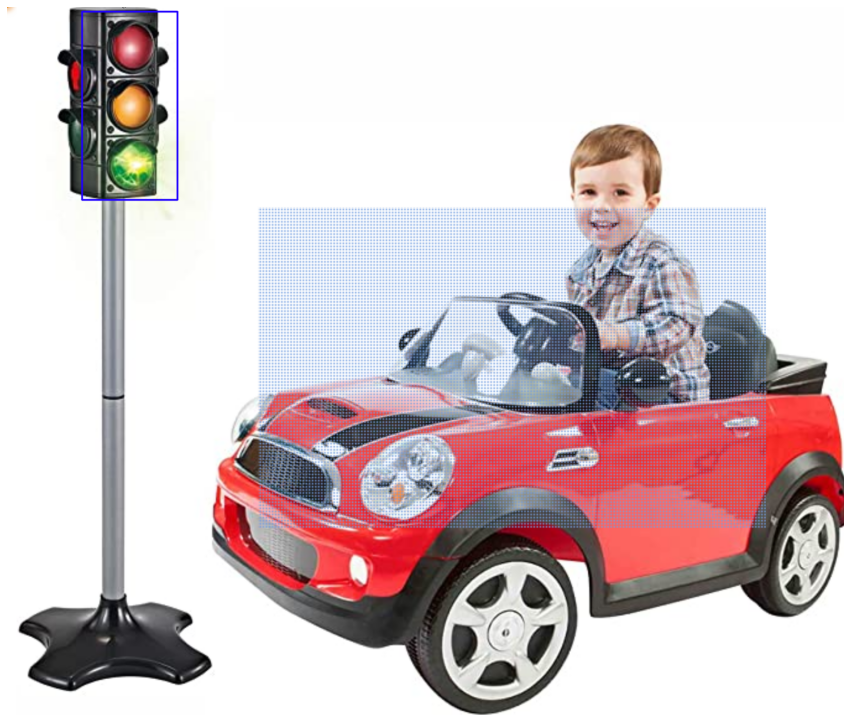

In [13]:
# load image
image = read_image_bgr('/content/drive/My Drive/testData/image.png')
model_image = image
# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
saved_model_loaded = tf.saved_model.load('/content/tensorRT1/', tags=[tag_constants.SERVING])
signature_keys = list(saved_model_loaded.signatures.keys())
print(signature_keys)

infer = saved_model_loaded.signatures['serving_default']
print(infer.structured_outputs)
#x = model_image.img_to_array(img)
x = np.expand_dims(image, axis=0)
x = preprocess_input(x)
x = tf.constant(x)
labeling = infer(x)
scores = labeling['filtered_detections/map/TensorArrayStack_1/TensorArrayGatherV3:0'].numpy()
labels = labeling['filtered_detections/map/TensorArrayStack_2/TensorArrayGatherV3:0'].numpy()
boxes = labeling['filtered_detections/map/TensorArrayStack/TensorArrayGatherV3:0'].numpy()
print(boxes, scores, labels)
print("processing time: ", time.time() - start)
labels_to_names = {0: 'traffic_light'}
# correct for image scale
boxes /= scale
#label
# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.3:
        break
        
    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
    
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(draw, b, caption)
    
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()